In [113]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms

In [114]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), # Flip image horizontally with 50% probability
    transforms.RandomRotation(degrees=30),  # Rotate image randomly up to ±30 degrees
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)), # Random crop and resize
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Adjust brightness, contrast
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5, 0.5, 0.5])
])

In [115]:
train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [116]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [117]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [118]:
test_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [119]:
train_dataset.data[1][1]

array([[140, 160, 169],
       [145, 153, 154],
       [125, 125, 118],
       [124, 129, 132],
       [150, 161, 173],
       [152, 164, 175],
       [174, 188, 200],
       [178, 189, 196],
       [134, 139, 137],
       [110, 111, 102],
       [133, 127, 120],
       [163, 156, 156],
       [192, 192, 187],
       [218, 219, 215],
       [240, 241, 238],
       [245, 246, 245],
       [241, 242, 239],
       [238, 239, 235],
       [234, 235, 229],
       [226, 227, 220],
       [142, 143, 136],
       [ 96,  97,  85],
       [ 99, 101,  84],
       [ 95,  96,  87],
       [ 89,  89,  86],
       [ 80,  81,  77],
       [ 65,  67,  60],
       [ 84,  86,  76],
       [ 92,  95,  80],
       [ 96,  99,  78],
       [ 77,  80,  62],
       [ 71,  73,  61]], dtype=uint8)

In [120]:
import matplotlib.pyplot as plt

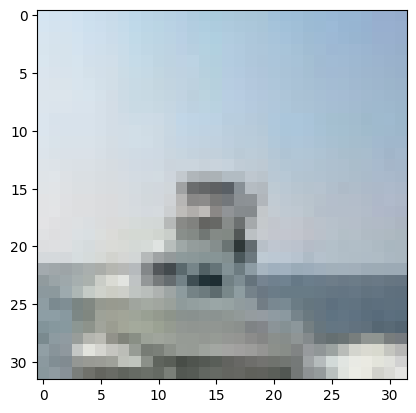

In [121]:
plt.imshow(train_dataset.data[100])

In [122]:
image, label = train_dataset[100] 

In [123]:
image = image.permute(1, 2, 0).numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


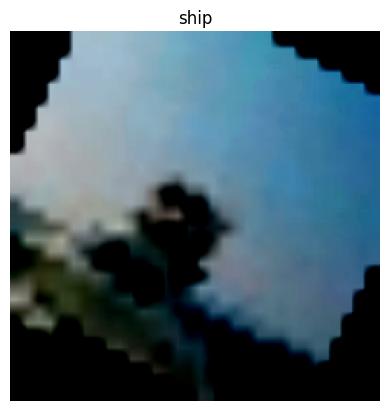

In [124]:
plt.imshow(image)
plt.axis('off')
plt.title(test_dataset.classes[label])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


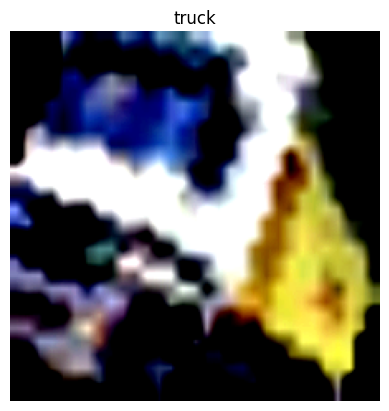

In [125]:
image, label = train_dataset[1] 
image = image.permute(1, 2, 0).numpy()
plt.imshow(image)
plt.axis('off')
plt.title(test_dataset.classes[label])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


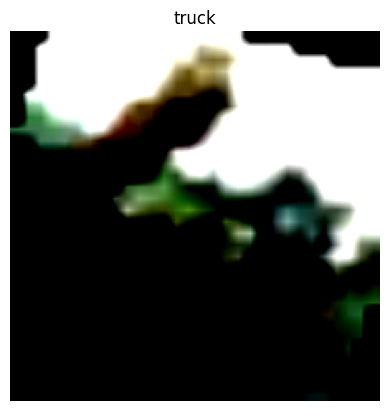

In [126]:
image, label = train_dataset[2] 
image = image.permute(1, 2, 0).numpy()
plt.imshow(image)
plt.axis('off')
plt.title(test_dataset.classes[label])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


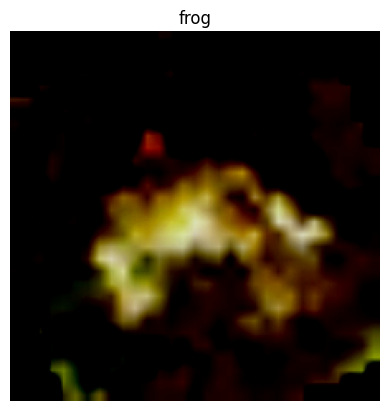

In [127]:
image, label = train_dataset[0] 
image = image.permute(1, 2, 0).numpy()
plt.imshow(image)
plt.axis('off')
plt.title(test_dataset.classes[label])
plt.show()

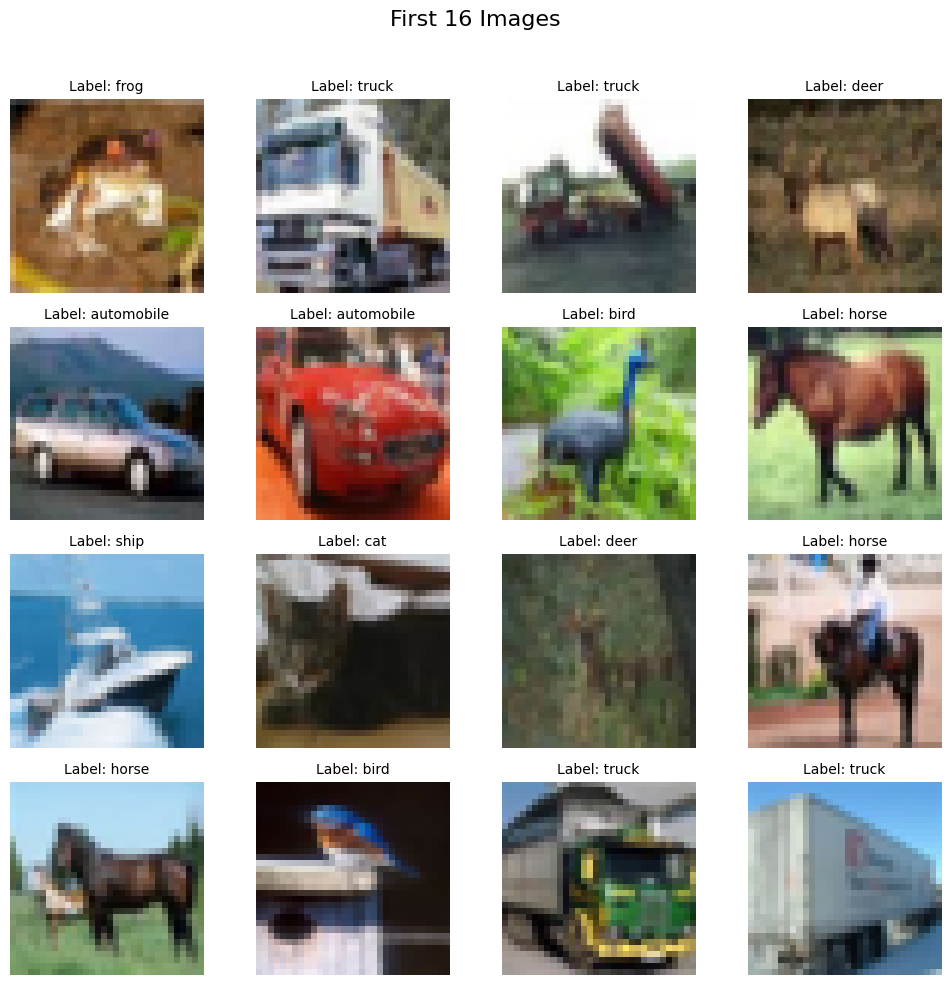

In [128]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Create a 4x4 grid
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images
for i, ax in enumerate(axes.flat):
    img = train_dataset.data[i]  # Extract image (shape: 32x32x3)
    
    ax.imshow(img)  # Show the RGB image
    ax.axis('off')  # Remove axis for a cleaner look
    
    # Get the class label
    label_idx = train_dataset.targets[i]  # Get class index
    label = train_dataset.classes[label_idx]  # Convert index to class name
    
    ax.set_title(f"Label: {label}", fontsize=10)  # Display label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

In [129]:
# Get the same image twice
img1, label1 = train_dataset[0]  # First call
img2, label2 = train_dataset[0]  # Second call (should be different due to augmentation)

In [130]:
# Convert back to numpy for visualization
img1 = img1.permute(1, 2, 0).numpy()
img2 = img2.permute(1, 2, 0).numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


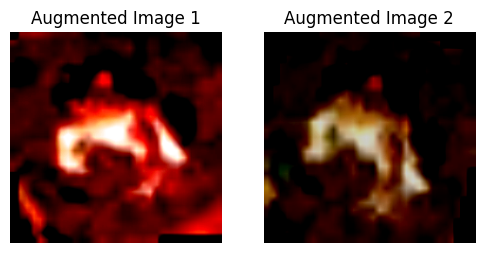

In [131]:
# Display original vs augmented image
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(img1)
axes[0].set_title("Augmented Image 1")
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title("Augmented Image 2")
axes[1].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


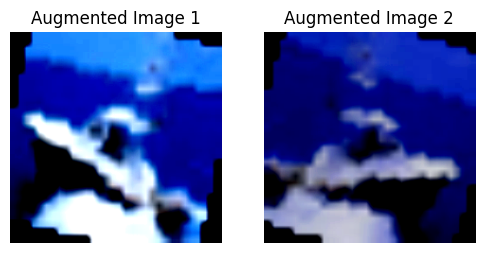

In [132]:
img1, label1 = train_dataset[8]  
img2, label2 = train_dataset[8]

img1 = img1.permute(1, 2, 0).numpy()
img2 = img2.permute(1, 2, 0).numpy()

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(img1)
axes[0].set_title("Augmented Image 1")
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title("Augmented Image 2")
axes[1].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


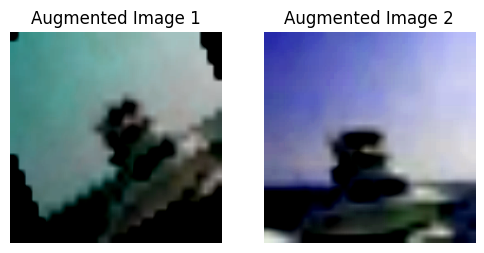

In [133]:
img1, label1 = train_dataset[100]  
img2, label2 = train_dataset[100]

img1 = img1.permute(1, 2, 0).numpy()
img2 = img2.permute(1, 2, 0).numpy()

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(img1)
axes[0].set_title("Augmented Image 1")
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title("Augmented Image 2")
axes[1].axis('off')

plt.show()

## How to Measure the Number of Data Samples Before and After Data Augmentation?

- Data augmentation in PyTorch does not permanently increase the dataset size. Instead, augmentations are applied on-the-fly during training. This means the total dataset size remains the same, but each time you access a sample, it might look different.

- However, if you want to physically increase the dataset size, you need to save the augmented images or manually duplicate the dataset.

In [134]:
print(f"Total original images: {len(train_dataset)}")

Total original images: 50000


In [135]:
print(f"Total original images: {len(test_dataset)}")

Total original images: 10000


In [148]:
# Now lets create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)

In [149]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [150]:
torch.cuda.empty_cache()

## lets use the pretrained model DenseNet121

In [151]:
from torchvision import models
import torch.nn as nn

In [152]:
model = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 10)  # Modify last layer for 10 classes

In [153]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [154]:
model = model.to(device)

In [155]:

# Define Loss & Optimizer
loss_fc = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [156]:
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.device_count())  # Should print number of GPUs (e.g., 1)
print(torch.cuda.get_device_name(0))  # Should print "RTX 2050"
print(torch.cuda.current_device())  # Should print 0

True
1
NVIDIA GeForce RTX 2050
0


In [157]:
torch.backends.cudnn.benchmark = True

In [158]:
# training loop

import time
start_time = time.time()

epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for features , label in train_loader:
        features, label = features.to(device), label.to(device)

        optimizer.zero_grad()
        outputs = model(features)
        loss = loss_fc(outputs, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time is {total_time / 60} Minutes!")

KeyboardInterrupt: 

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for feature, labels in test_loader:
        feature, labels = feature.to(device), labels.to(device)
        outputs = model(feature)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")